In [34]:
%matplotlib inline 
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
from google.protobuf.json_format import MessageToJson
import json
from MARSeval.cocoeval import COCOeval
from MARSeval.coco import COCO
import copy

fname = 'X:\\cristina_code_original\\tfrecords_keypoints\\front\\train_dataset-00000-of-00010'

tfrecord_unpacked=[]
for example in tf.python_io.tf_record_iterator(fname):
    tfrecord_unpacked.append(json.loads(MessageToJson(tf.train.Example.FromString(example))))

fid = 'D:\\MARS_eval_test\\top_2\\MARS_performance_pose.json'
with open(fid) as f:
    MARS_output = json.load(f)

In [1]:
from evaluation import evaluation

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [117]:
fid = 'D:\\MARS_eval_test\\top_2\\MARS_performance_pose.json'
saved_evals = evaluation.eval_coco(infile=fid)

Mean performance across keypoints------------------------------------------------------
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.919
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.930
Performance for keypoint: nose tip------------------------------------------------------
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.953
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.960
Performance for keypoint: right ear------------------------------------------------------
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.914
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.933
Performance for keypoint: left ear------------------------------------------------------
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.883
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.897
Perf

In [116]:
for partNum in range(8):
    MARS_gt = copy.deepcopy(MARS_output['gt_keypoints'])
    MARS_gt['annotations'] = [x for x in MARS_output['gt_keypoints']['annotations'] if x['category_id']==(partNum+1)]
    MARS_pred = [x for x in MARS_output['pred_keypoints'] if x['category_id']==(partNum+1)]

    gt_coco = COCO()
    gt_coco.dataset = MARS_gt
    gt_coco.createIndex()
    pred_coco = gt_coco.loadRes(MARS_pred)

    if not partNum:
        cocoEval = COCOeval(gt_coco, pred_coco, sigmaType='MARS_top',useParts=MARS_output['partNames'])
    else:
        print(MARS_output['partNames'][partNum-1])
        cocoEval = COCOeval(gt_coco, pred_coco, sigmaType='MARS_top',useParts=[MARS_output['partNames'][partNum-1]])
    cocoEval.evaluate()
    cocoEval.accumulate()
    print(cocoEval.params.kpt_oks_sigmas)
    cocoEval.summarize()

[0.039 0.045 0.045 0.042 0.067 0.067 0.044]
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.919
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.930
nose tip
[0.039]
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.953
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.960
right ear
[0.045]
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.914
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.933
left ear
[0.045]
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.883
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.897
neck
[0.042]
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.897
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.917
right side body
[0.067]
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 

In [57]:
np.sqrt(-2*math.log(0.9) * cocoEval.params.kpt_oks_sigmas**2 * gt['area'])

array([4.19438136, 4.8396708 , 4.8396708 , 4.51702608, 7.20573208,
       7.20573208, 4.73212256, 7.20573208, 9.03405216])

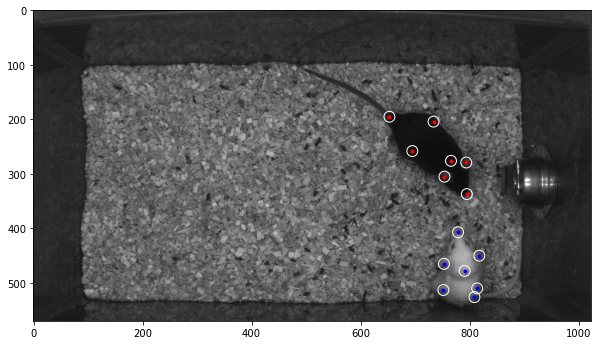

In [24]:
ind = 10

impth = 'D:\\MARS_eval_test\\extracted_images\\pose_top_testset_' + str(ind).zfill(4) + '.jpg'
im = Image.open(impth)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(im, cmap='gray')

gt = MARS_output['gt_keypoints']['annotations'][ind*2]
radii = np.sqrt(cocoEval.params.kpt_oks_sigmas**2 * gt['area']) # one-sigma radius for each keypoint

for x,y in zip(gt['keypoints'][::3],gt['keypoints'][1::3]):
    plt.plot(x,y,'r.')
    circle = plt.Circle((x,y), 10, ec='white', fill=False)
    ax.add_patch(circle)

gt = MARS_output['gt_keypoints']['annotations'][ind*2+1]
for x,y in zip(gt['keypoints'][::3],gt['keypoints'][1::3]):
    plt.plot(x,y,'b.')
    circle = plt.Circle((x,y), 10, ec='white', fill=False)
    ax.add_patch(circle)